In [1]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] != 'FM skills prediction':
    os.chdir('../..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from modules.fm_functions import *

In [3]:
fm_data_raw = pd.read_csv('data/FM 2023.csv')

In [4]:
fm_data_raw.columns

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggressiion',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decision', 'Determination', 'Flair', 'Leadership', 'Off The Ball',
       'Positioning', 'Teamwork', 'Work Rate', 'Acceleration', 'Agility',
       'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina',
       'Strength', 'Stability', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL',

In [5]:
fm_data_raw.columns
fm_outfilders_columns = ['Name', 'Position', 'Corners', 'Crossing', 'Dribbling', 'Finishing',
                         'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
                         'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
                         'Technique', 'Aggressiion', 'Anticipation', 'Bravery', 'Composure',
                         'Concentration', 'Vision', 'Decision', 'Determination', 'Flair',
                         'Leadership', 'Off The Ball', 'Teamwork', 'Work Rate', 'Positioning',
                         'Acceleration', 'Agility', 'Balance', 'Jumping Reach', 'Natural Fitness',
                         'Pace', 'Stamina', 'Strength']

**Outfield Players**
- **Defending:** Tackling (50%), Marking (25%) and Positioning (25%)
- **Physical:** Strength (25%), Stamina (25%), Balance (25%) and Agility(25%)
- **Speed:** Acceleration (50%) and Pace (50%)
- **Vision:** Vision (33%), Flair (33%), Passing (34%)
- **Attacking:** Finishing (34%), Off the ball (33%) and Composure (33%)
- **Technique:** Technique (34%), First Touch (33%) and Dribbling (33%)
- **Aerial:** Heading (50%) and Jumping Reach (50%)
- **Mental:** Determination (16,6%), Decisions (16,6%), Anticipation (16,6%), Teamwork (16,6%), Bravery (16,6%) and Concentration (16,6%)

*‘Standalone’ Attributes:*
- Aggression
- Work Rate
- Natural Fitness
- Leadership
- Crossing
- Corners
- Free-Kick Taking
- Penalty Taking
- Long Shots
- Long Throws

In [6]:
fm_data_outfielders = fm_data_raw[fm_data_raw['Position']!='GK']

**Goalkeepers**
- **Shot Stopping:** Reflexes (50%) and One on Ones (50%)
- **Aerial:** Handling (50%) and Aerial Reach (50%),
- **Communication:** Communication (50%) and Command of Area (50%)
- **Distribution:** Throwing (50%) and Kicking (50%)
- **Mental:** Anticipation (16,67%), Bravery (16,67%), Concentration (16,67%), Decisions (16,67%), Determination (16,67%) and Teamwork (16,67%)
- **Eccentricity:** Eccentricity (100%)
- **Physical:** Balance (25%), Agility (25%), Strength (25%) and Stamina (25%)
- **Speed:** Acceleration (50%) and Pace (50%)

*‘Standalone’ Attributes:*
- Rushing Out (Tendency)
- Punching (Tendency)
- Positioning
- Composure
- Technique
- Passing
- Vision
- Work Rate
- Leadership
- Off the ball
- Flair

In [7]:
# check that all skills for graphs are in the dataframe
[skill[0] for node in fm_outfielders_skills_graph_dict.values() \
 for skill in node if skill[0] not in fm_data_raw.columns]

[]

In [8]:
# check that all skills for graphs are in the dataframe
[skill[0] for node in fm_gks_skills_graph_dict.values() \
 for skill in node if skill[0] not in fm_data_raw.columns]

[]

In [9]:
fm_data_outfielders_skills = fm_data_outfielders[fm_outfilders_columns]

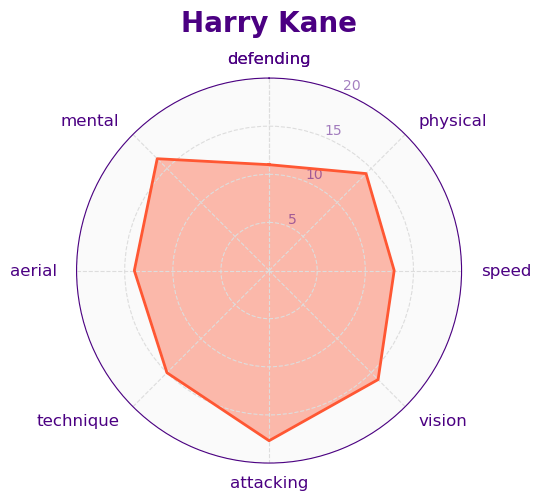

In [21]:
name = 'Harry Kane'
gk = False
test = fm_data_raw[fm_data_raw['Name']==name].iloc[0]
test = calculate_skill_nodes(test, gk=gk)
plot_fm_radar(test, gk=gk)

### Clustering outfielders

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
X = fm_data_outfielders_skills.drop(['Name', 'Position'], axis=1).values
scaler = MinMaxScaler()
pca = PCA(n_components=2)
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

elbow = {}
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    elbow[n] = kmeans


c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alibe\miniconda3\envs\fbref\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

In [13]:
results = [m.inertia_ for m in elbow.values()]

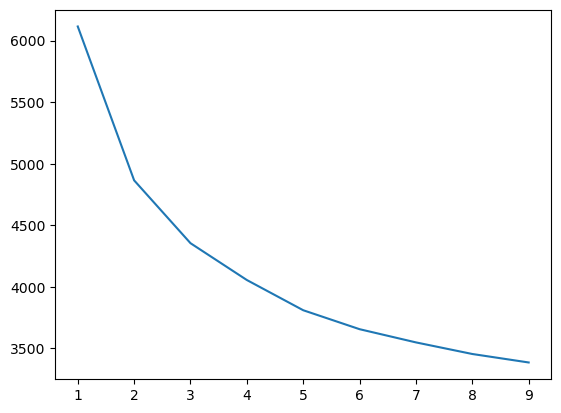

In [14]:
plt.plot(elbow.keys(), results)

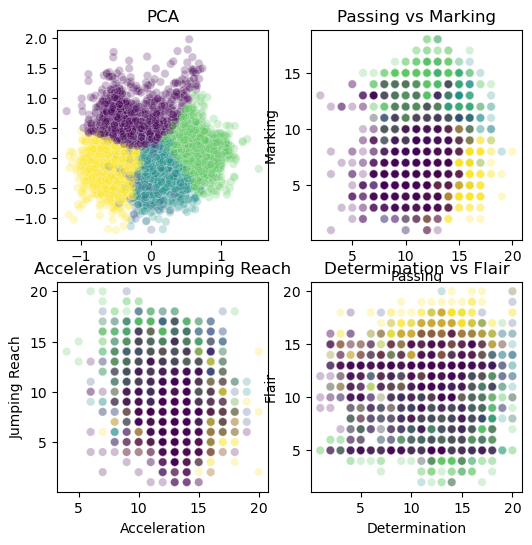

In [15]:
predictions = elbow[5].predict(X_scaled)
fig, axs = plt.subplots(2,2,figsize=(6,6))
axs[0,0].set_title('PCA')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], alpha=0.25, c=predictions, ax=axs[0,0])
axs[0,1].set_title('Passing vs Marking')
sns.scatterplot(data=fm_data_outfielders_skills, x='Passing', y='Marking',
                alpha=0.25, c=predictions, ax=axs[0,1])
axs[1,0].set_title('Acceleration vs Jumping Reach')
sns.scatterplot(data=fm_data_outfielders_skills, x='Acceleration', y='Jumping Reach',
                alpha=0.25, c=predictions, ax=axs[1,0])
axs[1,1].set_title('Determination vs Flair')
sns.scatterplot(data=fm_data_outfielders_skills, x='Determination', y='Flair',
                alpha=0.25, c=predictions, ax=axs[1,1])
plt.show()

In [16]:
fm_data_outfielders_skills[predictions==0]

,Name,Position,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,...,Work Rate,Positioning,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength
1586,Ola Aina,D/WB/M RL,5,12,12,7,11,4,11,6,...,12,9,17,14,12,11,16,17,13,10
1833,Djed Spence,D/WB/M/AM R,6,12,13,11,10,6,7,7,...,12,9,17,14,12,12,13,15,14,10
1881,Josan Fernández,M/AM RL,7,14,15,10,9,5,5,8,...,12,8,16,14,9,9,14,16,12,11
2104,Daniel James,M/AM RL,4,11,13,7,11,4,5,8,...,18,6,19,16,12,6,15,19,16,5
2768,Nathan Tella,AM/S R,4,11,14,11,11,7,7,8,...,16,7,16,13,6,7,15,16,15,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,3,4,5,4,4,1,6,1,...,6,11,13,10,6,11,16,12,6,7
8448,River Ries,S,2,2,11,11,11,2,6,1,...,3,3,11,8,2,6,12,9,7,6
8449,Halilcan Doğan,D C,1,1,1,2,4,1,12,3,...,4,12,11,10,4,11,9,10,3,4
8450,Adijat Sefer,S,3,4,12,7,8,3,12,4,...,4,2,12,10,4,10,9,12,6,8
